<a href="https://colab.research.google.com/github/arjunjanamatti/deep_learning/blob/master/shortest_route_using_reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

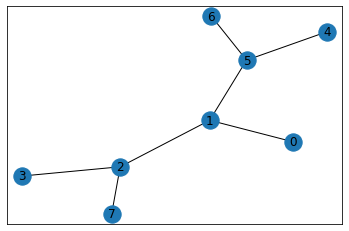

In [1]:
import numpy as np
import pylab as plt
import networkx as nx

# mapping denote the corresponding edges between nodes
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
goal = 3
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [3]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [4]:
# assign zeros to paths and 200 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 200
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 200
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 200

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [5]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1., 200.,  -1.,  -1.,  -1.,   0.],
        [ -1.,  -1.,   0., 200.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [6]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
  
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

In [7]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 200.0
Score: 100.0
max_value 160.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 200.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 200.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 160.0
Score: 180.0
max_value 160.0
Score: 260.0
max_value 160.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 160.0
Score: 260.0
max_value 328.0
Score: 197.560975609

In [8]:
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Trained Q matrix:
[[  0.          63.97927517   0.           0.           0.
    0.           0.           0.        ]
 [ 51.18342014   0.          79.97409397   0.           0.
   51.17264818   0.           0.        ]
 [  0.          63.97927517   0.         100.           0.
    0.           0.          63.99536896]
 [  0.           0.          79.9942112   99.99874498   0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.18342014   0.           0.        ]
 [  0.          63.97927517   0.           0.          40.94673611
    0.          40.94673611   0.        ]
 [  0.           0.           0.           0.           0.
   51.18342014   0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]]


In [15]:
# Testing
current_state = 7
steps = [current_state]

while current_state != 3:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

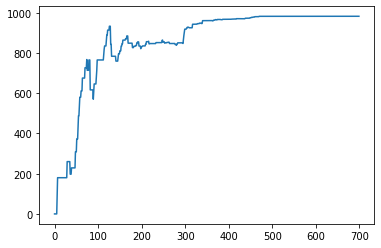

In [16]:
plt.plot(scores)
plt.show()

In [17]:
print("Most efficient path:")
print(steps)

Most efficient path:
[7, 2, 3]
